This is for verify

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread("#1_HISI_00424s(260C)_dia.png")
for x_coordinate in [97, 125, 152, 179, 206, 234, 261, 288, 315, 343, 370, 397, 424, 452, 479, 506, 533, 561, 588, 615, 642, 670, 697, 724, 751, 779, 806]:
    indices= list(np.where((img[: , x_coordinate ,0] > 145) & (img[: , x_coordinate, 1] < 50) & (img[: , x_coordinate, 2] < 50))) 
    
    try:
        print(x_coordinate)
#         print(indices[0][0])
#     if indices[0] [0]!= []:
#         print(x_coordinate)
#         print(indices[0][0])

        img[:, x_coordinate,1] = 0
        img[:, x_coordinate,0] = 0
        img[:, x_coordinate,2] = 0
    except:
        print(x_coordinate,'could not find the point')

cv2.imshow("check",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# for i in coordinates:
#     print(i)


ooooops! x= 97 could not find the red warpage, please find the warpage by yourself.
144
ooooops! x= 97 could not find the blue warpage, please find the warpage by yourself.
158
ooooops! x= 397 could not find the blue warpage, please find the warpage by yourself.
277
ooooops! x= 452 could not find the blue warpage, please find the warpage by yourself.
281
ooooops! x= 479 could not find the blue warpage, please find the warpage by yourself.
280


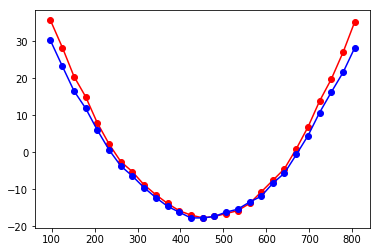

In [50]:
import cv2
import numpy as np
import csv
from matplotlib import pyplot as plt 
# img = cv2.imread("./picture.jpg")

# cv2.imshow("test",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


pixel_miny = 415
pixel_maxy = 56

min_y = -70
max_y = 70

    

# x = min_x+(gpixel_x-pixel_minx)*(max_x-min_x)/(pixel_maxx-pixel_minx)
# y = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)

list_warpage_red = [] 
list_warpage_blue = []
img = cv2.imread("#1_HISI_00424s(260C)_dia.png")

# the x_coordinate possibly need to find by yourself 
list_xcoordinate = [97, 125, 152, 179, 206, 234, 261, 288, 315, 343, 370, 397, 424, 452, 479, 506, 533, 561, 588, 615, 642, 670, 697, 724, 751, 779, 806]
for x_coordinate in list_xcoordinate:
###########  this is for red warpage ##################
    y_coordinate = list(np.where((img[: , x_coordinate ,0] < 40) & (img[: , x_coordinate, 1] < 40) & (img[: , x_coordinate, 2] > 150)))
    try:
        gpixel_y = y_coordinate[0][0]
        if gpixel_y < 460:
            warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
            list_warpage_red.append(warpage)
        else:
            print("ooooops! x=",x_coordinate,"could not find the red warpage, please find the warpage by yourself.")
            gpixel_y = int(input())
            warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
            list_warpage_red.append(warpage)
        
    except:
        print("ooooops! x=",x_coordinate,"could not find the red warpage, please find the warpage by yourself.")
        gpixel_y = int(input())
        warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
        list_warpage_red.append(warpage)
    
############# this is for blue warpage ###############
    y_coordinate = list(np.where((img[: , x_coordinate ,0] > 150) & (img[: , x_coordinate, 1] < 40) & (img[: , x_coordinate, 2] < 40)))
    try:
        gpixel_y = y_coordinate[0][0]
        if gpixel_y < 460:
            warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
            list_warpage_blue.append(warpage)
        else:
            print("ooooops! x=",x_coordinate,"could not find the blue warpage, please find the warpage by yourself.")
            gpixel_y = int(input())
            warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
            list_warpage_blue.append(warpage)
    except:
        print("ooooops! x=",x_coordinate,"could not find the blue warpage, please find the warpage by yourself.")
        gpixel_y = int(input())
        warpage = min_y+(gpixel_y-pixel_miny)*(max_y-min_y)/(pixel_maxy-pixel_miny)
        list_warpage_blue.append(warpage)
        
        
with open('result_260.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(list_xcoordinate)
    writer.writerow(list_warpage_red)
    writer.writerow(list_warpage_blue)        

plt.plot(list_xcoordinate, list_warpage_red, 'o-', c='red')
plt.plot(list_xcoordinate, list_warpage_blue, 'o-', c='blue')
plt.show()        
        
# print(list_warpage_red)    
# print(list_warpage_blue)        

In [51]:
import pandas as pd 
# data = pd.read_csv("./result_240.csv")

list_result = [pd.read_csv("result_"+str(i)+".csv") for i in [260, 240, 220, 200, 183, 150, 100, 30]]
result = pd.concat(list_result)
result = result.reset_index(drop=True)
result.columns = [i for i in range(0, 54, 2)]
result.to_csv("result_final.csv", index=False)